### TELECOM CHURN 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

##### DATA DICTIONARY 

#### Acronyms   
- CIRCLE_ID - Telecom circle area to which the customer belongs to
- LOC - Local calls  within same telecom circle
- STD - STD calls  outside the calling circle
- IC - Incoming calls
- OG - Outgoing calls
- T2T - Operator T to T ie within same operator mobile to mobile
- T2M - Operator T to other operator mobile
- T2O - Operator T to other operator fixed line
- T2F - Operator T to fixed lines of T
- T2C - Operator T to its own call center
- ARPU - Average revenue per user
- MOU - Minutes of usage  voice calls
- AON - Age on network  number of days the customer is using the operator T network
- ONNET - All kind of calls within the same operator network
- OFFNET - All kind of calls outside the operator T network
- ROAM - Indicates that customer is in roaming zone during the call
- SPL - Special calls
- ISD - ISD calls
- RECH - Recharge
- NUM - Number
- AMT - Amount in local currency
- MAX - Maximum
- DATA - Mobile internet
- 3G - G network
- AV - Average
- VOL - Mobile internet usage volume in MB
- 2G - G network
- PCK - Prepaid service schemes called  PACKS
- NIGHT - Scheme to use during specific night hours only
- MONTHLY - Service schemes with validity equivalent to a month
- SACHET - Service schemes with validity smaller than a month
- *.6 - KPI for the month of June
- *.7 - KPI for the month of July
- *.8 - KPI for the month of August
- FB_USER - Service scheme to avail services of Facebook and similar social networking sites
- VBC - Volume based cost  when no specific scheme is not purchased and paid as per usage



##### IGNORE WARNINGS

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

##### IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Importing RFE
from sklearn.feature_selection import RFE

#### IMPORTING & READING THE DATASET

In [56]:
# Importing dataset
data = pd.read_csv('Dataset/train (1).csv')
 
##copy data
data_copy=data

# To display maximum rows and columns
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

### CREATING REQUIRED FUNCTIONS

In [57]:
# To find number of rows and cols
def num_rows(data):
    rows, columns = data.shape
    print(f'The dataset has {rows} rows and {columns} columns')

# To find percentage missing values
def percentage_missing(data):
    print('\nPERCENTAGE MISSING VALUES:')
    c=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            c+=1
    if c == len(data.columns):print('There is no missing values in the dataset')
    print("\n")
def make_unique_dist_list(data):
# CHECKING THE UNIQUE AND DISTINCT VARIABLE
    rm_lst = []
    for i in data.columns:
        if data[i].nunique() in (1, 69999) and i!='churn_probability':
            print(i, data[i].nunique(), sep = ' --> ')
            rm_lst.append(i)
    return rm_lst
def remove_var_rmlist(rmlist,data):
# REMOVING THE ABOVE VARIABLE
    for i in rm_lst:
        del data[i]
    return data


### NUMBER OF ROWS AND COLS

In [58]:
num_rows(data)

The dataset has 69999 rows and 172 columns


#### NUMBER OF FEATURES

In [59]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 163 numerical features and 9 categorical features.


#### BASIC INFO ON THE DATASET

In [60]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Looking for data duplicates

In [61]:
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### ANALYSIS ON TARGET VARIABLE

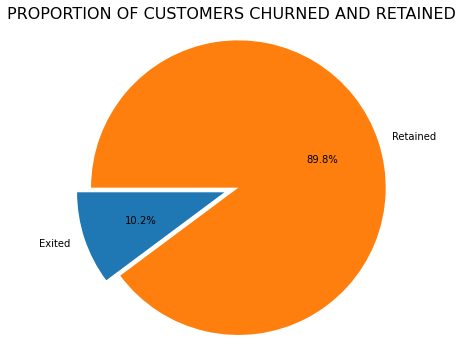

In [62]:
labels = 'Exited', 'Retained'
sizes = [data.churn_probability[data['churn_probability']==1].count(), 
         data.churn_probability[data['churn_probability']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180)
ax1.axis('equal')
plt.title("PROPORTION OF CUSTOMERS CHURNED AND RETAINED", size = 16)
plt.show()

#### DATA TREATMENT 

###  Removing features which has one unique and all distinct value

In [63]:
rm_lst=make_unique_dist_list(data)
remove_var_rmlist(rm_lst,data)
# DATA DIMENSION AFTER REMOVAL
num_rows(data)

id --> 69999
circle_id --> 1
loc_og_t2o_mou --> 1
std_og_t2o_mou --> 1
loc_ic_t2o_mou --> 1
last_date_of_month_6 --> 1
last_date_of_month_7 --> 1
last_date_of_month_8 --> 1
std_og_t2c_mou_6 --> 1
std_og_t2c_mou_7 --> 1
std_og_t2c_mou_8 --> 1
std_ic_t2o_mou_6 --> 1
std_ic_t2o_mou_7 --> 1
std_ic_t2o_mou_8 --> 1
The dataset has 69999 rows and 158 columns


### MISSING VALUE TREATMENT

In [64]:
# Finding the percentage missing values in the dataset
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2m_mou_8' has 5.29% missing values
The featu

In [65]:
print('\nLESS THAN 40% MISSING VALUES IMPUTATION')
rm_lst = []

for i in data.columns:
    if data[i].isnull().mean()*100 > 40.0 :
        rm_lst.append(i)

print(rm_lst)
print(len(rm_lst))    


LESS THAN 40% MISSING VALUES IMPUTATION
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
30


In [66]:
### Removing columns more than 50% null values
for feature in rm_lst:
    del data[feature]

In [67]:
num_rows(data)
percentage_missing(data)

The dataset has 69999 rows and 128 columns

PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2

#### Removing date columns as it has no relavant to ten analysis being done

In [68]:
# List the date columns
date_cols = [date for date in data.columns.to_list() if 'date' in date]
print(date_cols) 
for feature in date_cols:
    del data[feature]

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [69]:
for feature in data:
    if data[feature].isnull().sum()!=0:
        #print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        data=data[~np.isnan(data[feature])]
    

In [70]:
num_rows(data)

The dataset has 63842 rows and 125 columns


In [71]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = data.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
print(col_list)
print (data.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    data[avg_col_name] = (data[col_6] + data[col_7])/ 2

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2f_mou',
       'std_og_mou', 'std_og_mou', 'isd_og_mou', 'isd_og_mou', 'spl_og_mou',
       'spl_og_mou', 'og_others', 'og_others', 'total_og_mou', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2m_mou',
       'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'std_ic_mou',
       'total_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'isd

In [72]:
# we dont need columns from which we have derived new features, we will drop those columns
num_rows(data)
col_to_drop = data.filter(regex='_6|_7').columns
data.drop(col_to_drop, axis=1, inplace=True)

num_rows(data)
data.columns

The dataset has 63842 rows and 165 columns
The dataset has 63842 rows and 85 columns


Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability', 'avg_arpu_av67',
       'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67',
       'avg_roam_og_mou_av67', 'avg_loc_og_t2

In [73]:
target=[]
for var in data.columns:
    if  1.*data[var].nunique()/data[var].count() <= 0.05:
        target.append(var)
print(f'Length of selected columns for analysis {len(target)}')      

Length of selected columns for analysis 27


In [74]:
data.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability', 'avg_arpu_av67',
       'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67',
       'avg_roam_og_mou_av67', 'avg_loc_og_t2

##### UNIVARIATE ANALYSIS

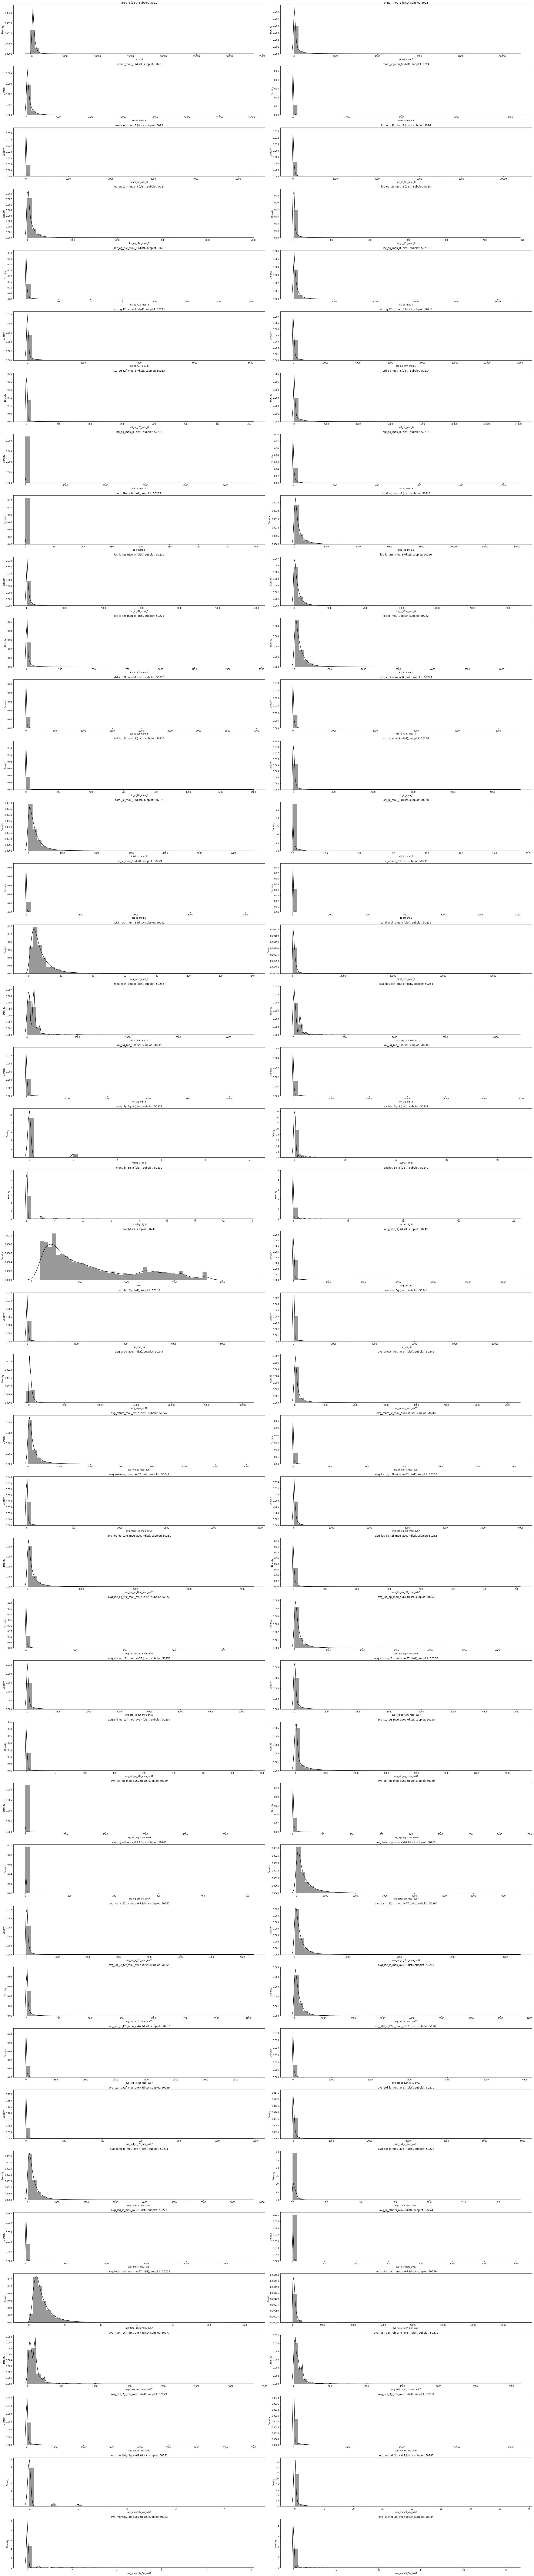

In [52]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter



        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.distplot(data[i], color='black')
        c = c + 1
        
      
    
plt.tight_layout()
plt.show();

##### INFERENCE OF UNIVARIATE ANALYSIS

- All the considered features show right skew graphs
- As lower value of recharge population is more than ones who do higher amount recharge or people tends to talk less in video call

##### BIVARIATE ANALYSIS

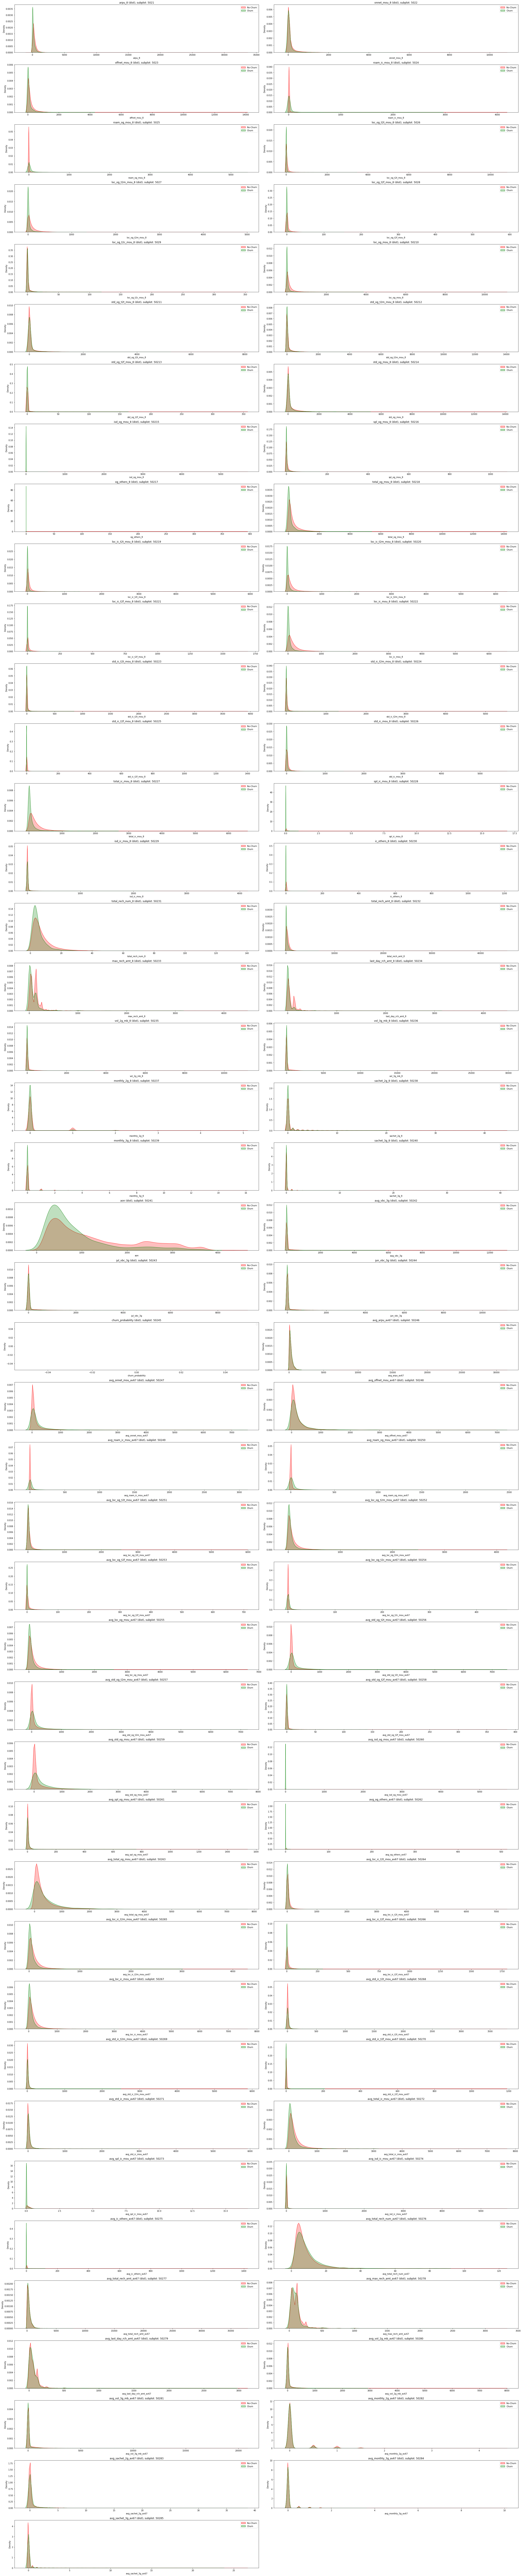

In [76]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter



        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        
        ax = sns.kdeplot(data[i][(data["churn_probability"] == 0)],
                color="Red", shade = True)
        ax = sns.kdeplot(data[i][(data["churn_probability"] == 1)],
                ax =ax, color="Green", shade= True)
        ax.legend(["No-Churn","Churn"],loc='upper right')
       
        c = c + 1
        
      
    
plt.tight_layout()
plt.show();

##### INFERENCE OF BIVARIATE 

- total_og_mou_8,loc_ic_t2m_mou_8,roam_ic_mou8 are few of many columns that shows no  churn than others 
- total_ic_mou_8,monthly_2g_8 shows greater churn. Monthly packs of both 2g and 3g might have to be looked up that is making customer not satisfied
- Age on a network (aon) if the value or number of days on a network is less then such behviour tend to churn more but if they stay in operator T for greater days then they dont churn 

##### MULTIVARIATE ANALYSIS

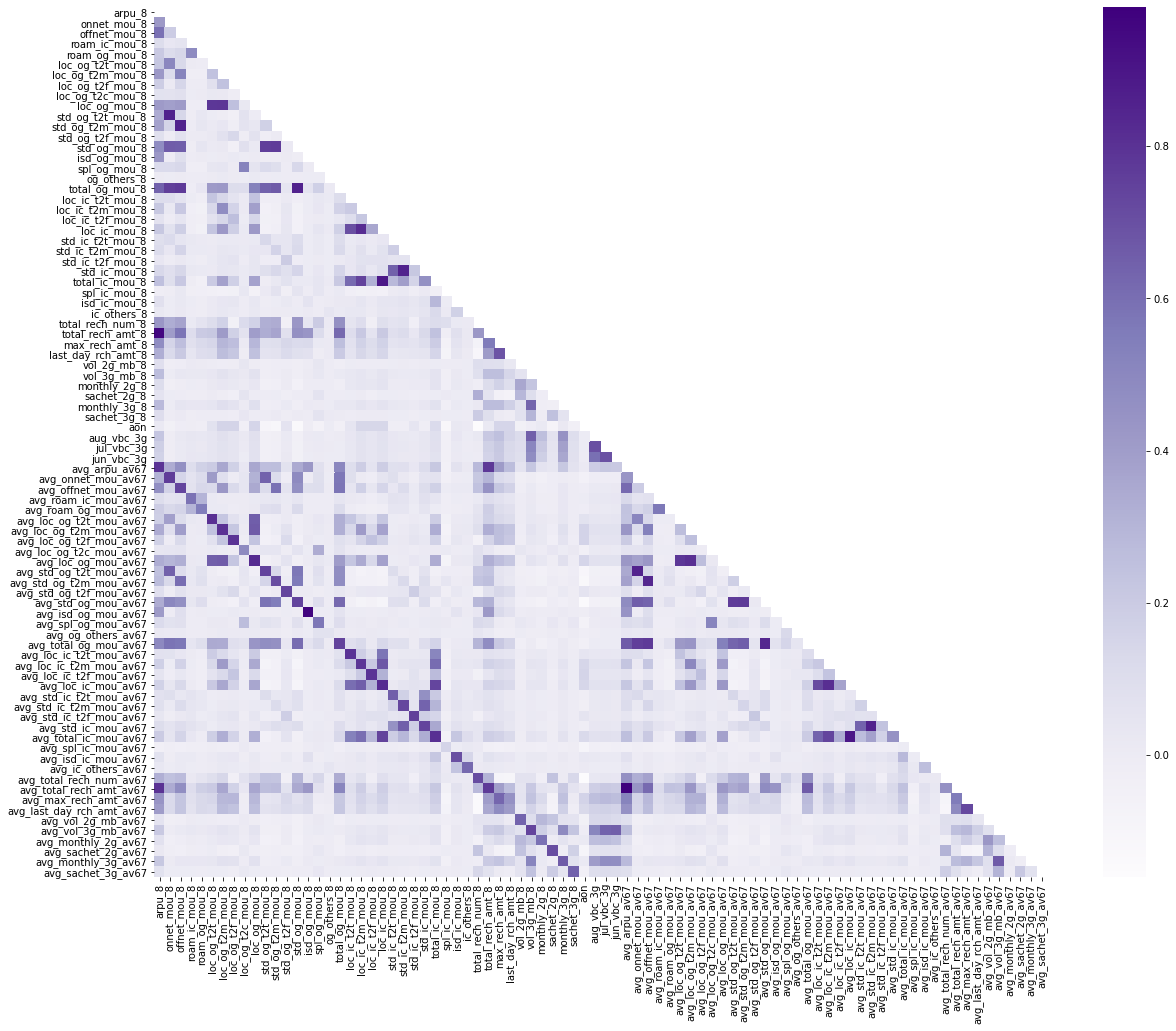

In [53]:
##create heat map
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(20,16))
sns.heatmap(corr, 
            annot=False , 
            fmt='.2f', 
            mask=mask, 
            cmap='Purples')
plt.show()

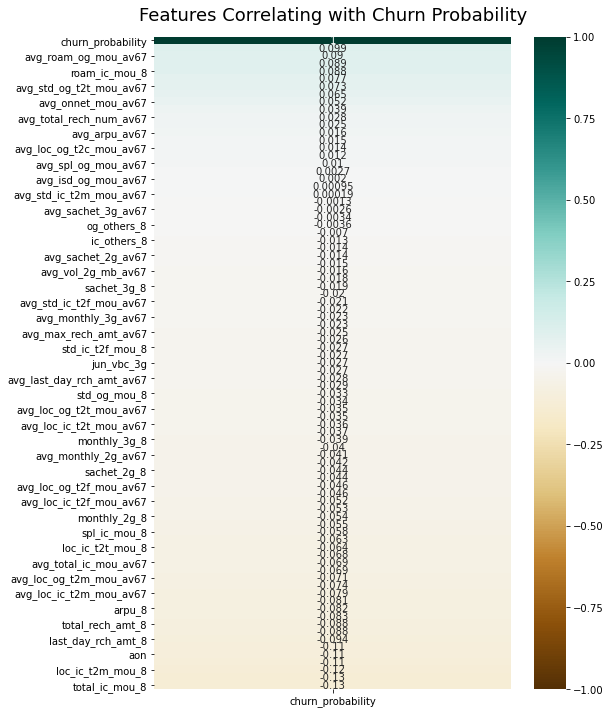

In [75]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(data.corr()[['churn_probability']].sort_values(by='churn_probability', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Churn Probability', fontdict={'fontsize':18}, pad=16);

##### INFERENCE OF MULTIVARIATE

- Correlation with target among other features is seen very low 
- avg_roam_og_mou_av67 has highest correlation with target

###### Remove target col from feature dataframe

In [22]:
X = data.drop(['churn_probability'], axis=1)
y = data['churn_probability']
data.drop('churn_probability', axis=1, inplace=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (44689, 84)
Dimension of X_test: (19153, 84)


In [26]:
### scaling after train test split
scaler = preprocessing.StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

### WITHOUT PCA 

#### We shall try without PCA model creation and hyperparam tuning and compare the metrics then with PCA to see difference 

##### CLASS IMBALANCE HANDLING 

In [27]:
def resample(X_imbal,y_imbal):
    from imblearn.combine import SMOTETomek  # Synthetic Minority Oversampling TEchnique - Tomek
    smote_model = SMOTETomek(random_state=42)
    X_r, y_r = smote_model.fit_resample(X_imbal, y_imbal)
    return X_r,y_r
    
    

In [28]:
X_r,y_r=resample(X_train,y_train)
print('Shape of X and y after sampling: ',X_r.shape, y_r.shape)

Shape of X and y after sampling:  (84136, 84) (84136,)


##### RFE WITH LOGISTIC REGRESSION 

In [29]:
lr = LogisticRegression()
rfe = RFE(lr,n_features_to_select=15)   
rfe = rfe.fit(X_r, y_r)
rfe_features = list(data.columns[rfe.support_])

In [30]:
print("15 most important features selected by RFE ")
pd.DataFrame(rfe_features,columns=["Important features"],index=list(range(1,16)))

15 most important features selected by RFE 


,Important features
1,offnet_mou_8
2,roam_og_mou_8
3,std_og_t2m_mou_8
4,og_others_8
5,loc_ic_t2f_mou_8
6,loc_ic_mou_8
7,std_ic_t2f_mou_8
8,spl_ic_mou_8
9,total_rech_num_8
10,total_rech_amt_8


In [31]:
X_rfe = pd.DataFrame(data=X_r).iloc[:, rfe.support_]
y_rfe = y_r
lr.fit(X_rfe, y_rfe)
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

In [77]:
from sklearn.metrics import classification_report
def Metrics(X_train,y_train,X_test,y_test,lr):
    y_pred = lr.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm1=confusion_matrix(y_test, y_pred)
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Confusion Matrix : \n', cm1)
    y_pred_train = lr.predict(X_train)
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Sensitivity : ', round(sensitivity1,2) )
    print("Report on train set ")
    print(classification_report(y_train, y_pred_train))
    
    print("Report on test set ")
    print(classification_report(y_test, y_pred))
    return lr
    

In [78]:
lr=Metrics(X_rfe,y_r,X_test_rfe,y_test,lr)

Confusion Matrix : 
 [[13444  4527]
 [  212   970]]
Sensitivity :  0.75
Report on train set 
              precision    recall  f1-score   support

           0       0.82      0.75      0.79     42068
           1       0.77      0.84      0.80     42068

    accuracy                           0.80     84136
   macro avg       0.80      0.80      0.80     84136
weighted avg       0.80      0.80      0.80     84136

Report on test set 
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     17971
           1       0.18      0.82      0.29      1182

    accuracy                           0.75     19153
   macro avg       0.58      0.78      0.57     19153
weighted avg       0.93      0.75      0.82     19153



- RFE with logistic shows 75% acuuracy with 75% sensitivity 

###### TUNING LOGISTIC MODEL

In [34]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.09,0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = lr,
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_rfe, y_r)
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
 The highest test sensitivity is 0.8380611570670004 at C = 0.09


In [79]:
lr = LogisticRegression(C=best_C)
lr.fit(X_rfe, y_r)
lr=Metrics(X_rfe,y_r,X_test_rfe,y_test,lr)

Confusion Matrix : 
 [[13411  4560]
 [  211   971]]
Sensitivity :  0.75
Report on train set 
              precision    recall  f1-score   support

           0       0.82      0.75      0.79     42068
           1       0.77      0.84      0.80     42068

    accuracy                           0.80     84136
   macro avg       0.80      0.80      0.80     84136
weighted avg       0.80      0.80      0.80     84136

Report on test set 
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     17971
           1       0.18      0.82      0.29      1182

    accuracy                           0.75     19153
   macro avg       0.58      0.78      0.57     19153
weighted avg       0.93      0.75      0.81     19153



##### CONCLUSION 

- Optimal value is 0.09 for C
- Accuracy of test is 75% which is not bad 


#### RANDOM FORREST

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_r,y_r=resample(X_train,y_train)
model_rf = RandomForestClassifier()
model_rf.fit(X_r, y_r)
model_rf=Metrics(X_r,y_r,X_test,y_test,model_rf)

Confusion Matrix : 
 [[15401  2570]
 [  288   894]]
Sensitivity :  0.86
Report on train set 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42068
           1       1.00      1.00      1.00     42068

    accuracy                           1.00     84136
   macro avg       1.00      1.00      1.00     84136
weighted avg       1.00      1.00      1.00     84136

Report on test set 
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     17971
           1       0.26      0.76      0.38      1182

    accuracy                           0.85     19153
   macro avg       0.62      0.81      0.65     19153
weighted avg       0.94      0.85      0.88     19153



##### TUNING RANDOM SEARCH MODEL

In [83]:
param_grid = {
    
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_r, y_r)
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
We can get accuracy of 0.9433180856920315 using {'max_depth': 30, 'min_samples_leaf': 5, 'n_estimators': 100}


In [84]:
# model with the best hyperparameters

model_rf = RandomForestClassifier(bootstrap=True,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                             n_estimators=grid_search.best_params_['n_estimators'])
model_rf.fit(X_r, y_r)
model_rf=Metrics(X_r,y_r,X_test,y_test,model_rf)

Confusion Matrix : 
 [[13956  4015]
 [  193   989]]
Sensitivity :  0.78
Report on train set 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     42068
           1       0.98      0.99      0.98     42068

    accuracy                           0.98     84136
   macro avg       0.98      0.98      0.98     84136
weighted avg       0.98      0.98      0.98     84136

Report on test set 
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     17971
           1       0.20      0.84      0.32      1182

    accuracy                           0.78     19153
   macro avg       0.59      0.81      0.59     19153
weighted avg       0.94      0.78      0.84     19153



##### CONCLUSION

- Random forest is not performing good looks like overfitting model but  logistic has lesser test accuracy but has very less variation with train accuarcy and test accuaracy.
- But random forest has better sensitivity than logistic model which is also very important parameter in this problem
- With Logistic algorithm we brought 15 important features using RFE as shown below.
- Hence according to this top contributers are 


In [85]:
pd.DataFrame(rfe_features,columns=["Important features"],index=list(range(1,16)))

,Important features
1,offnet_mou_8
2,roam_og_mou_8
3,std_og_t2m_mou_8
4,og_others_8
5,loc_ic_t2f_mou_8
6,loc_ic_mou_8
7,std_ic_t2f_mou_8
8,spl_ic_mou_8
9,total_rech_num_8
10,total_rech_amt_8


#### PCA

In [40]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
X_r,y_r=resample(X_train,y_train)
# apply PCA on train data
pca.fit(X_r)

PCA(random_state=100)

In [41]:
X_tr_pca = pca.fit_transform(X_r)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(84136, 84)
(19153, 84)


In [42]:
col = list(data.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.203783,0.041037,0.063853,arpu_8
1,0.172973,-0.067402,-0.059845,onnet_mou_8
2,0.180915,0.016848,0.001896,offnet_mou_8
3,0.050094,-0.286611,0.513266,roam_ic_mou_8
4,0.081153,-0.180525,0.283977,roam_og_mou_8
5,0.081424,0.086926,0.011626,loc_og_t2t_mou_8
6,0.115202,0.162390,0.040448,loc_og_t2m_mou_8
7,0.048020,0.094497,0.040300,loc_og_t2f_mou_8
8,0.029767,0.002984,-0.006473,loc_og_t2c_mou_8
9,0.125592,0.161445,0.034985,loc_og_mou_8


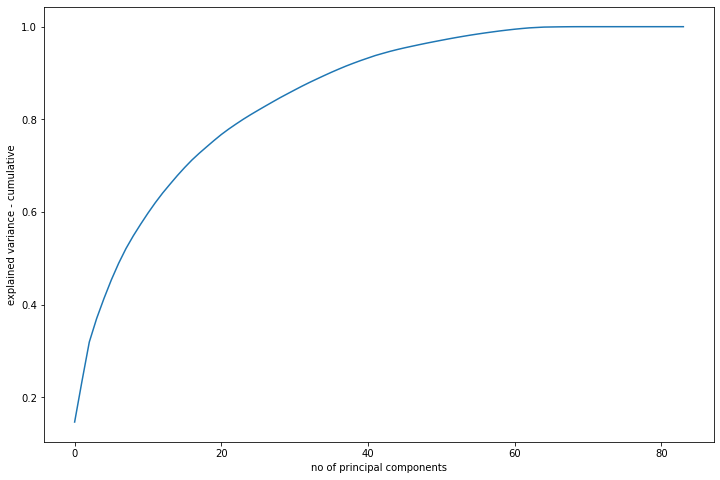

In [43]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [44]:
# PCA with 33 components
pca_33 = PCA(n_components=45)

df_tr_pca_33 = pca_33.fit_transform(X_r)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(84136, 45)
(19153, 45)


##### LOGISTIC WITH PCA

##### HYPER PARAMETER TUNING

In [45]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(df_tr_pca_33, y_r)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [46]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.829383551060771 at C = 1000


In [47]:
lr_pca = LogisticRegression(C=best_C)
lr_pca.fit(df_tr_pca_33, y_r)
lr_pca=Metrics(df_tr_pca_33,y_r,df_test_pca_33,y_test,lr_pca)


Sensitivity :  0.7580546435924546
Confusion Matrix : 
 [[13623  4348]
 [  226   956]]
Sensitivity :  0.76
Report on train set 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79     42068
           1       0.78      0.83      0.80     42068

    accuracy                           0.80     84136
   macro avg       0.80      0.80      0.80     84136
weighted avg       0.80      0.80      0.80     84136

Report on test set 
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     17971
           1       0.18      0.81      0.29      1182

    accuracy                           0.76     19153
   macro avg       0.58      0.78      0.58     19153
weighted avg       0.93      0.76      0.82     19153



##### RANDOM FOREST BASE MODEL WITH PCA

In [49]:
param_grid = {
    
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(df_tr_pca_33, y_r)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, verbose=1)

In [50]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.934368190529392 using {'max_depth': 30, 'min_samples_leaf': 5, 'n_estimators': 100}


In [51]:
# model with the best hyperparameters

model_rf = RandomForestClassifier(bootstrap=True,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                             n_estimators=grid_search.best_params_['n_estimators'])
model_rf.fit(df_tr_pca_33, y_r)
model_rf=Metrics(df_tr_pca_33,y_r,df_test_pca_33,y_test,model_rf)

Sensitivity :  0.9428523732680429
Confusion Matrix : 
 [[16944  1027]
 [  517   665]]
Sensitivity :  0.94
Report on train set 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     42068
           1       0.98      0.99      0.99     42068

    accuracy                           0.99     84136
   macro avg       0.99      0.99      0.99     84136
weighted avg       0.99      0.99      0.99     84136

Report on test set 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     17971
           1       0.39      0.56      0.46      1182

    accuracy                           0.92     19153
   macro avg       0.68      0.75      0.71     19153
weighted avg       0.93      0.92      0.93     19153



##### CONCLUSION

- Random forest accuracy with PCA shows greater accuracy of 92%   
- Hence I conclude that Random forest with PCA shows better accuracy and sensitivity which are prime metrics evaluated and considered.
- This could be because grid search cv chose best parameters 